# Springboard Project #1
## Review of Executive Function Task Data

#### Data Import, Cleaning and Review of Missing data

The data set consists of 94 text files, one for each subject in the experiment. Each data file contained a header record with 231 individual task records.  Each task record is made up of a group of lines, each data point on its own line, with a format very much like a dictionary.  The first step was to read through those text files and convert them to two pandas dataframes - one for the header, and one for the individual data records of interest.  There were also some additional data points that were not relevant, those had to be ignored.

##### Import necessary packages and other up-front tasks

In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
basepath = r'C:\Users\Eric\OneDrive\Documents\Springboard\Project\Data'
os.chdir(basepath)
firsthdr=True
firstline=True

for i in os.listdir(basepath):
    hdrend=False
    inframe=False
    with open(i) as openfileobject:
        for line in openfileobject:
            linest=line.strip()
            if not hdrend:
                if linest == '*** Header End ***':
                    hdrend=True
                    Subject=d1['Subject']
                    print('Subject: '+Subject)
                    if firsthdr:
                        hdrdf=pd.DataFrame(d1,index=[0])
                        firsthdr=False
                    else:
                        hdrdf=hdrdf.append(d1,ignore_index=True)
                elif linest == '*** Header Start ***':
                    d1={}
                else:
                    s1=linest.split(':')
                    list1=[]
                    for item in s1:
                        s2=item.strip()
                        list1.append(s2)
                    d1[list1[0]]=list1[1]
            elif inframe:
                if linest == '*** LogFrame End ***':
                    inframe = False
                    d1['Subject']=Subject
                    if firstline:
                        lindf=pd.DataFrame(d1,index=[0])
                        firstline=False
                    else:
                        lindf=lindf.append(d1,ignore_index=True)
                elif curlevel == '3':
                    s1=linest.split(':')
                    list1=[]
                    for item in s1:
                        s2=item.strip()
                        list1.append(s2)
                    d1[list1[0]]=list1[1]
            else:
                if linest == '*** LogFrame Start ***':
                    inframe = True
                    d1={}
                elif re.search(r'Level',linest)!=None:
                    s1=linest.split(':')
                    list1=[]
                    for item in s1:
                        s2=item.strip()
                        list1.append(s2)
                    curlevel = list1[1]
                    

Subject: 006
Subject: 010
Subject: 013
Subject: 014
Subject: 015
Subject: 016
Subject: 019
Subject: 022
Subject: 026
Subject: 030
Subject: 032
Subject: 035
Subject: 038
Subject: 039
Subject: 040
Subject: 043
Subject: 052
Subject: 056
Subject: 053
Subject: 061
Subject: 064
Subject: 065
Subject: 068
Subject: 069
Subject: 070
Subject: 071
Subject: 074
Subject: 078
Subject: 079
Subject: 085
Subject: 087
Subject: 089
Subject: 093
Subject: 096
Subject: 098
Subject: 101
Subject: 104
Subject: 105
Subject: 106
Subject: 175
Subject: 109
Subject: 111
Subject: 1111
Subject: 112
Subject: 113
Subject: 114
Subject: 116
Subject: 117
Subject: 118
Subject: 119
Subject: 121
Subject: 123
Subject: 124
Subject: 126
Subject: 128
Subject: 129
Subject: 130
Subject: 131
Subject: 132
Subject: 133
Subject: 134
Subject: 135
Subject: 136
Subject: 137
Subject: 138
Subject: 139
Subject: 141
Subject: 142
Subject: 143
Subject: 145
Subject: 146
Subject: 147
Subject: 149
Subject: 151
Subject: 152
Subject: 155
Subject: 15

After inital review of the resulting dataframe, I noticed that two subjects had no usable results, just a header and one partial task.  The text files for those two subjects were deleted and the above script re-run.

To start cleaning the data, I converted the response time variable from a string to a number, and also reviewed NaN entries.

In [3]:
lindf['Response']=pd.to_numeric(lindf['StimulusDisplay.RT'], errors='coerce')

In [4]:
lindf.loc[lindf['Response'].isnull()]

,CorrectAnswer,List1,List1.Cycle,List1.Sample,Procedure,Running,Stimulus,StimulusDisplay.ACC,StimulusDisplay.CRESP,StimulusDisplay.RESP,...,List3,List3.Cycle,List3.Sample,List4,List4.Cycle,List4.Sample,List5,List5.Cycle,List5.Sample,Response
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The rows with NaN in the response time appear to be empty across the board, so they were removed from the result dataframe.

In [5]:
lindf=lindf[~lindf['Response'].isnull()]

The participant is presented with a word prompt during the task.  The word prompts are broken into a group of 10 "neutral" words and 10 "emotional" words.  The 10 "emotional" words have 5 positive and 5 negative.  I'm going to create a category variable to assign these groups for analysis.  I'll also add a boolean column for if the question was answered correctly.

In [52]:
nlist=['calm','contain','control','controlled','disclose','emotional','express','expressive','inhibit','reveal']
lindf.loc[lindf['Stimulus'].isin(nlist),'stimtype']='Neutral'
plist=['gold','good','honor','lucky','pleasant']
lindf.loc[lindf['Stimulus'].isin(plist),'stimtype']='Positive'
nglist=['bad','filth','gloom','rotten','unpleasant']
lindf.loc[lindf['Stimulus'].isin(nglist),'stimtype']='Negative'
lindf.loc[lindf['StimulusDisplay.RESP']==lindf['CorrectAnswer'],'Correct']=True
lindf.loc[lindf['StimulusDisplay.RESP']!=lindf['CorrectAnswer'],'Correct']=False

(array([  1.52290000e+04,   3.70500000e+03,   7.36000000e+02,
          2.84000000e+02,   1.22000000e+02,   6.20000000e+01,
          3.80000000e+01,   2.80000000e+01,   1.40000000e+01,
          7.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   2.00000000e+00]),
 array([  1.00000000e+00,   1.19760000e+03,   2.39420000e+03,
          3.59080000e+03,   4.78740000e+03,   5.98400000e+03,
          7.18060000e+03,   8.37720000e+03,   9.57380000e+03,
          1.07704000e+04,   1.19670000e+04,   1.31636000e+04,
          1.43602000e+04,   1.55568000e+04,   1.67534000e+04,
          1.79500000e+04,   1.91466000e+04,   2.03432000e+04,
          2.15398000e+04,   2.27364000e+04,   2.39330000e+04]),
 <a list of 20 Patch objects>)

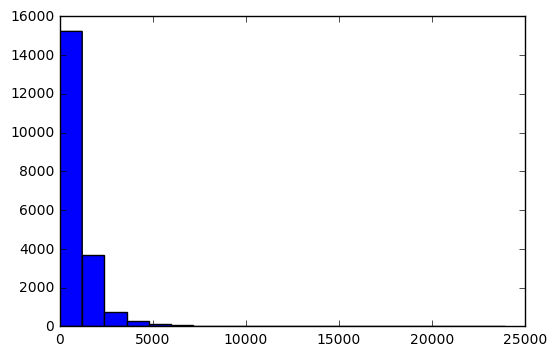

In [6]:
fig, ax = plt.subplots()
ax.hist(lindf['Response'],bins=20)

(array([   38.,   216.,   869.,  3937.,  4298.,  2839.,  1799.,  1247.,
          968.,   701.,   519.,   414.,   351.,   288.,   237.,   217.,
          160.,   115.,   108.,   100.]),
 array([  1.00000000e+00,   1.50850000e+02,   3.00700000e+02,
          4.50550000e+02,   6.00400000e+02,   7.50250000e+02,
          9.00100000e+02,   1.04995000e+03,   1.19980000e+03,
          1.34965000e+03,   1.49950000e+03,   1.64935000e+03,
          1.79920000e+03,   1.94905000e+03,   2.09890000e+03,
          2.24875000e+03,   2.39860000e+03,   2.54845000e+03,
          2.69830000e+03,   2.84815000e+03,   2.99800000e+03]),
 <a list of 20 Patch objects>)

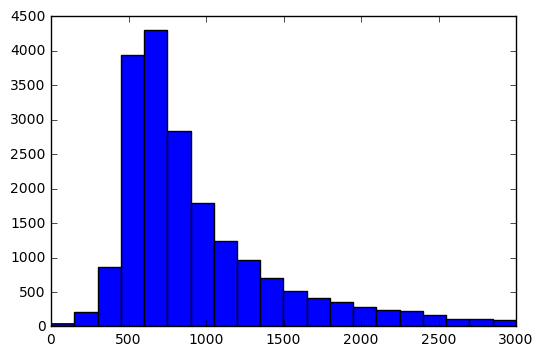

In [54]:
lindf2=lindf[lindf['Response']<3000]
fig,ax = plt.subplots()
ax.hist(lindf2['Response'],bins=20)

It looks like we have a lot of large values out to the right on this graph.  The Response variable is meant to measure response time to the task, and immediate human response times should generally run between 300 and 600 msec, so the most frequent values would make sense.  We will determine later in analysis whether larger values should be trimmed down to some maximum (like 1000 msec), or treated as non-responses.

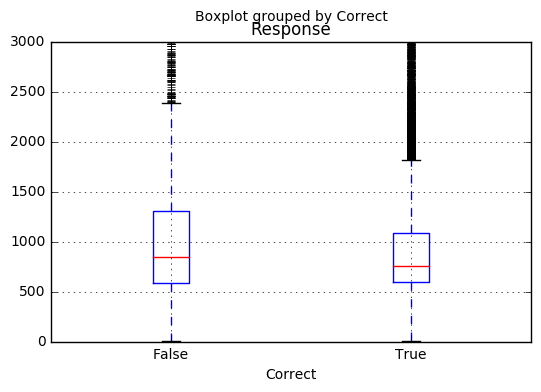

In [44]:
lindf2.boxplot(column='Response',by='Correct')

This would make intuitive sense, that if participants weren't confident of the answer, that they would take longer to answer and make more mistakes.

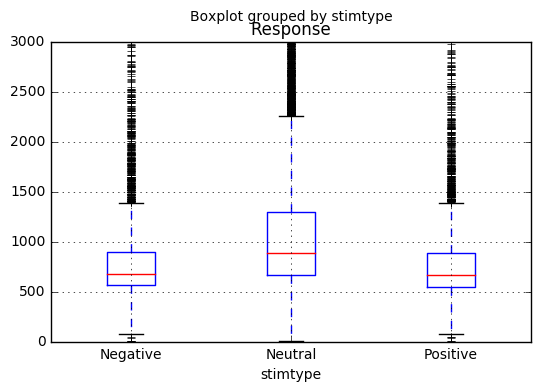

In [55]:
lindf2.boxplot(column='Response',by='stimtype')


It is interesting that the neutral prompts result in longer, and more variable, response times.